In [8]:
# 在 Notebook 开头运行：
import os
import sys
# 切换到项目根目录（包含 data/、scripts/ 的文件夹）
os.chdir(r"C:\Users\pc_of_han\Documents\code\第四周\week4 02")  
print("当前工作目录：", os.getcwd())  # 确认是否切换成功
# 获取项目根目录（已通过 os.chdir 切换到根目录）
project_root = os.getcwd()  
# 将 scripts 目录加入搜索路径
sys.path.append(os.path.join(project_root, "scripts"))  

当前工作目录： C:\Users\pc_of_han\Documents\code\第四周\week4 02


In [9]:
# 南瓜数据集探索性分析（Data Insights）

## 1. 环境准备
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties  # 导入字体属性类
import pandas as pd
import numpy as np
import seaborn as sns
from configuration import DATA_PATH, FEATURE_COLUMNS, TARGET_COLUMN
from data_analysis import load_data
from feature_processing import process_features


# 设置可视化风格
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')

# 定义中文字体（使用Windows系统必存的微软雅黑，路径固定）
chinese_font = FontProperties(fname=r"C:\Windows\Fonts\msyh.ttc")  # 微软雅黑
# 备选：若微软雅黑不存在，切换为宋体（系统必装）
# chinese_font = FontProperties(fname=r"C:\Windows\Fonts\simsun.ttc")  

In [10]:
# 加载原始数据
data = load_data()

# 查看前5行
data.head()

# 数据类型与缺失值概览
print("数据类型：\n", data.dtypes)
print("\n缺失值统计：\n", data[FEATURE_COLUMNS + [TARGET_COLUMN]].isnull().sum())

数据形状: (1757, 27)
缺失值统计:
 City Name       0
Package         0
Variety         5
Origin          3
Item Size     279
Color         616
Date            0
mean_price      0
dtype: int64
目标变量统计:
 count    1757.000000
mean      128.771138
std        86.426495
min         0.240000
25%        24.250000
50%       145.000000
75%       192.500000
max       480.000000
Name: mean_price, dtype: float64
数据类型：
 City Name           object
Type                object
Package             object
Variety             object
Sub Variety         object
Grade              float64
Date                object
Low Price          float64
High Price         float64
Mostly Low         float64
Mostly High        float64
Origin              object
Origin District     object
Item Size           object
Color               object
Environment        float64
Unit of Sale        object
Quality            float64
Condition          float64
Appearance         float64
Storage            float64
Crop               float64
Repack 

目标变量（mean_price）统计：
 count    1757.000000
mean      128.771138
std        86.426495
min         0.240000
25%        24.250000
50%       145.000000
75%       192.500000
max       480.000000
Name: mean_price, dtype: float64


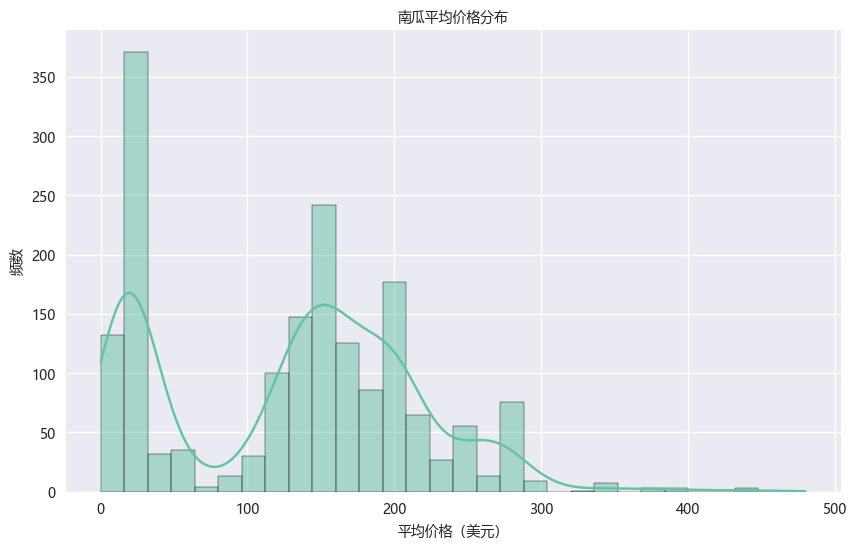

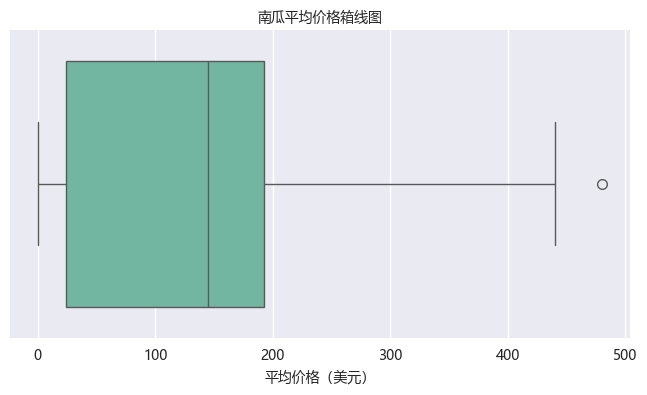

In [11]:
# 统计描述
print("目标变量（mean_price）统计：\n", data[TARGET_COLUMN].describe())

# 分布直方图
plt.figure(figsize=(10, 6))
sns.histplot(data[TARGET_COLUMN], kde=True, bins=30)
plt.title('南瓜平均价格分布', fontsize=14, fontproperties=chinese_font)  # 标题加字体
plt.xlabel('平均价格（美元）', fontproperties=chinese_font)  # X轴标签加字体
plt.ylabel('频数', fontproperties=chinese_font)  # Y轴标签加字体
plt.xticks(fontproperties=chinese_font)  # X轴刻度加字体
plt.yticks(fontproperties=chinese_font)  # Y轴刻度加字体
plt.show()

# 箱线图（检测异常值）
plt.figure(figsize=(8, 4))
sns.boxplot(x=data[TARGET_COLUMN])
plt.title('南瓜平均价格箱线图', fontsize=14, fontproperties=chinese_font)
plt.xlabel('平均价格（美元）', fontproperties=chinese_font)
plt.xticks(fontproperties=chinese_font)
plt.yticks(fontproperties=chinese_font)
plt.show()

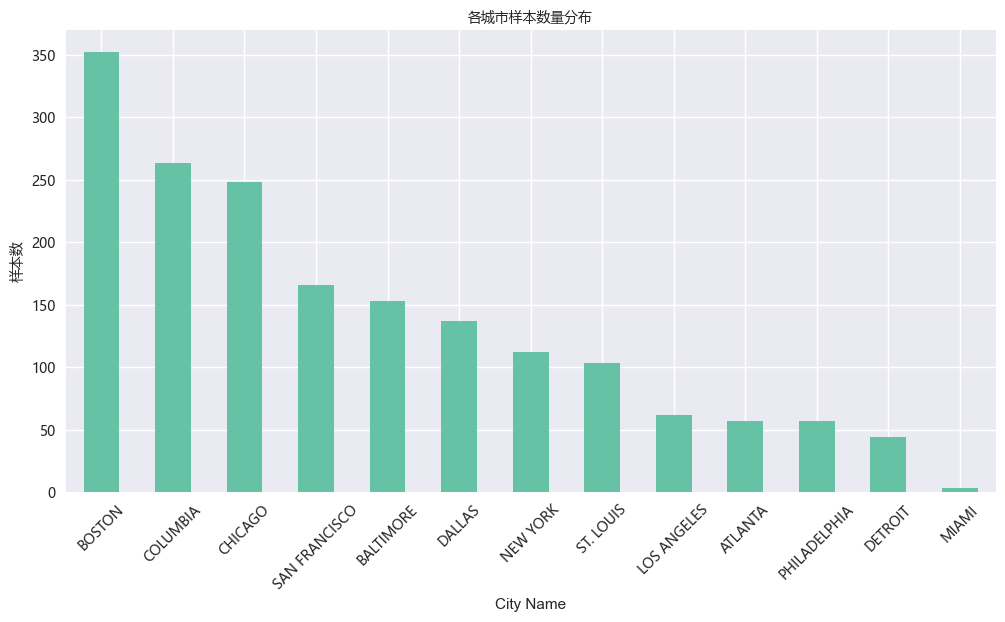

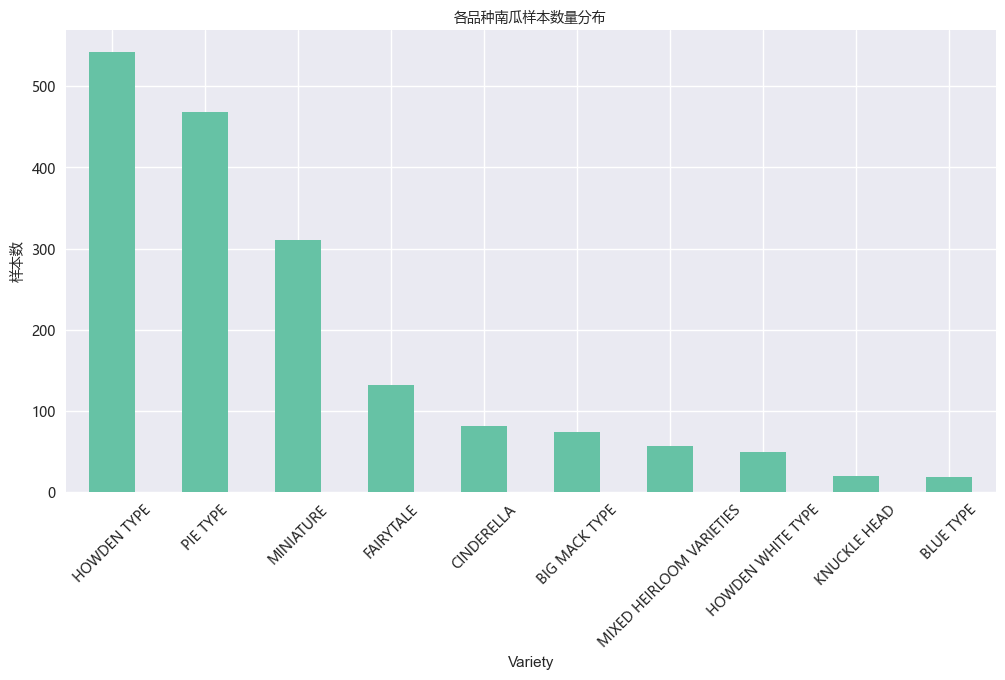

In [12]:
# 城市（City Name）分布
plt.figure(figsize=(12, 6))
data['City Name'].value_counts().plot(kind='bar')
plt.title('各城市样本数量分布', fontsize=14, fontproperties=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)  # 刻度旋转+字体
plt.ylabel('样本数', fontproperties=chinese_font)
plt.yticks(fontproperties=chinese_font)
plt.show()

# 品种（Variety）分布
plt.figure(figsize=(12, 6))
data['Variety'].value_counts().plot(kind='bar')
plt.title('各品种南瓜样本数量分布', fontsize=14, fontproperties=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.ylabel('样本数', fontproperties=chinese_font)
plt.yticks(fontproperties=chinese_font)
plt.show()

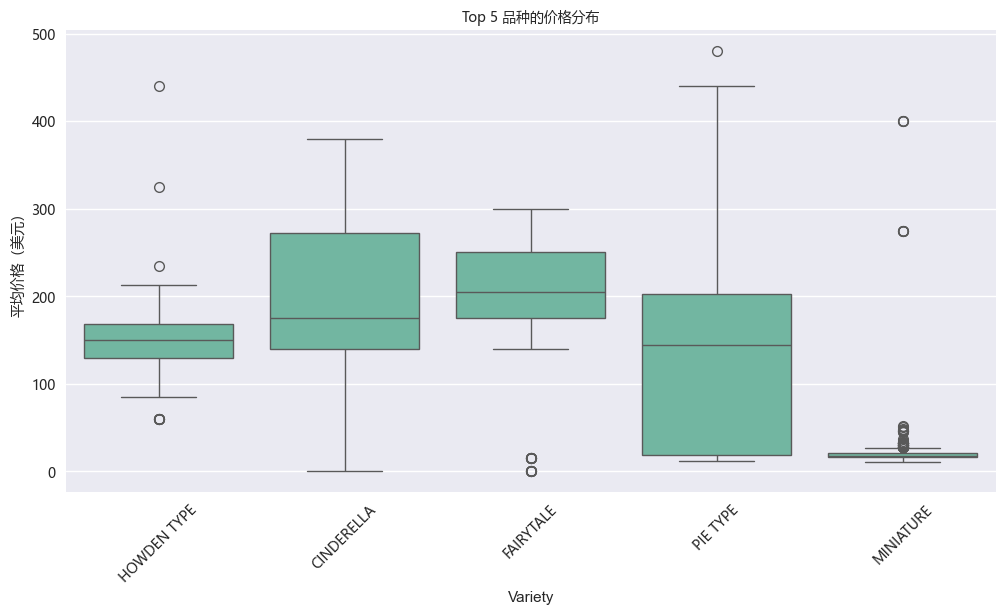

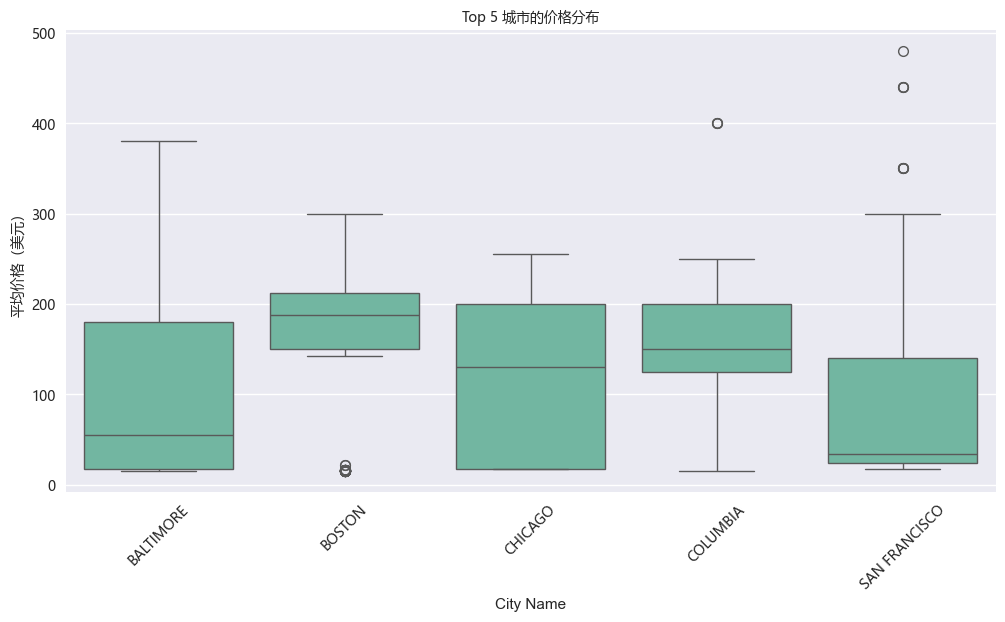

In [13]:
# 不同品种的价格差异
top_varieties = data['Variety'].value_counts().head(5).index  # 取样本最多的5个品种
plt.figure(figsize=(12, 6))
sns.boxplot(x='Variety', y=TARGET_COLUMN, data=data[data['Variety'].isin(top_varieties)])
plt.title('Top 5 品种的价格分布', fontsize=14, fontproperties=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.ylabel('平均价格（美元）', fontproperties=chinese_font)
plt.yticks(fontproperties=chinese_font)
plt.show()

# 不同城市的价格差异
top_cities = data['City Name'].value_counts().head(5).index
plt.figure(figsize=(12, 6))
sns.boxplot(x='City Name', y=TARGET_COLUMN, data=data[data['City Name'].isin(top_cities)])
plt.title('Top 5 城市的价格分布', fontsize=14, fontproperties=chinese_font)
plt.xticks(rotation=45, fontproperties=chinese_font)
plt.ylabel('平均价格（美元）', fontproperties=chinese_font)
plt.yticks(fontproperties=chinese_font)
plt.show()

C:\Users\pc_of_han\AppData\Local\Temp\ipykernel_14884\164491346.py:6: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=('ci', 95)` for the same effect.

  sns.lineplot(x='month', y=TARGET_COLUMN, data=data, ci=95)


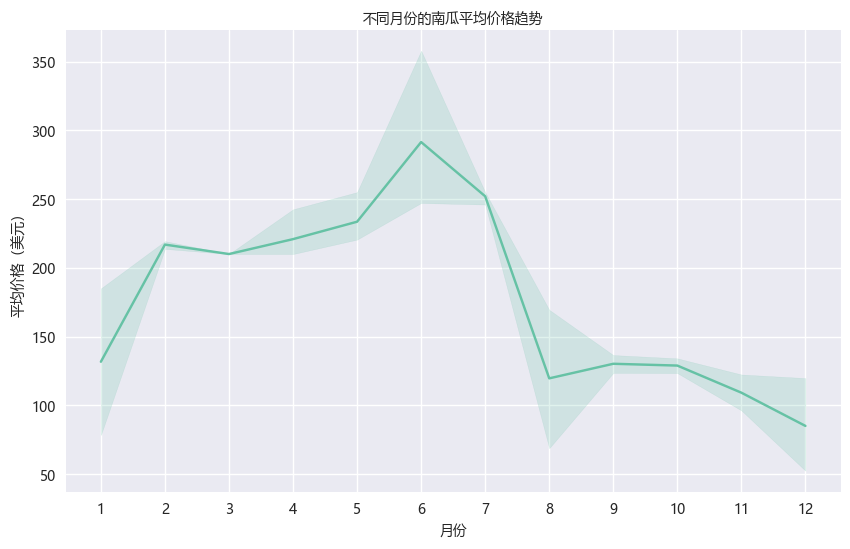

C:\Users\pc_of_han\Documents\code\第四周\week4 02\scripts\feature_processing.py:20: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_processed[col].fillna(df_processed[col].mode()[0], inplace=True)
C:\Users\pc_of_han\Documents\code\第四周\week4 02\scripts\feature_processing.py:22: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are se

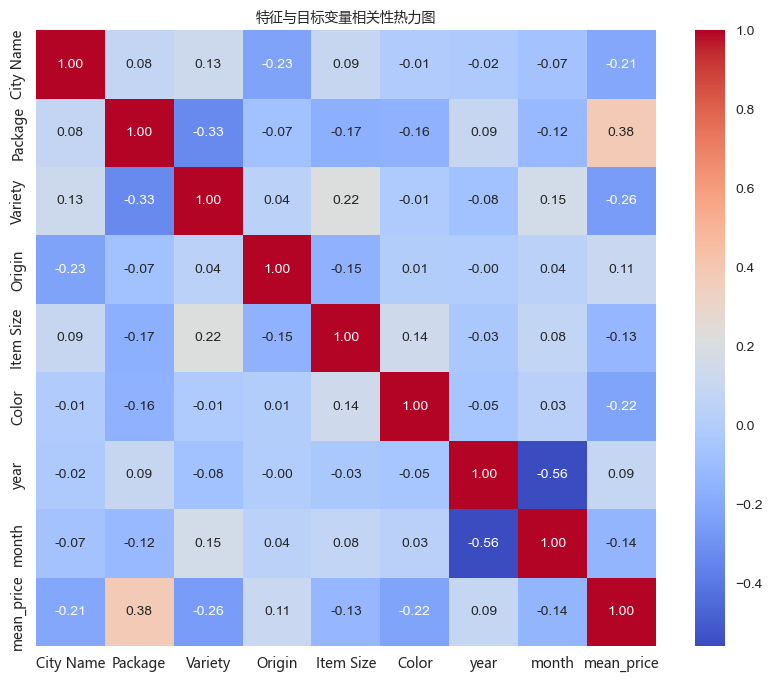

In [14]:
# 提取月份并分析价格趋势
data['Date'] = pd.to_datetime(data['Date'], format='%m/%d/%y')
data['month'] = data['Date'].dt.month

plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y=TARGET_COLUMN, data=data, ci=95)
plt.title('不同月份的南瓜平均价格趋势', fontsize=14, fontproperties=chinese_font)
plt.xlabel('月份', fontproperties=chinese_font)
plt.ylabel('平均价格（美元）', fontproperties=chinese_font)
plt.xticks(range(1, 13), fontproperties=chinese_font)  # 月份刻度加字体
plt.yticks(fontproperties=chinese_font)
plt.show()


# In[8]:


# 处理特征后计算相关性
X, y, _ = process_features(data, FEATURE_COLUMNS)
# 加入目标变量
corr_data = X.copy()
corr_data[TARGET_COLUMN] = y

# 相关性热力图
plt.figure(figsize=(10, 8))
corr = corr_data.corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('特征与目标变量相关性热力图', fontsize=14, fontproperties=chinese_font)
plt.xticks(fontproperties=chinese_font)  # 热力图X轴刻度加字体
plt.yticks(fontproperties=chinese_font)  # 热力图Y轴刻度加字体
plt.show()